# Analysis of business indicators of the entertainment application ProcrastinatePRO+

The product is the entertainment app Procrastinate Pro+. For the past few months, the business has consistently suffered losses - a large amount of money has been invested in attracting users without tangible results. It is necessary to determine the reasons for the inefficiency of attracting users and form recommendations for the marketing department to improve efficiency.

At the disposal there is a server log with data on application visits by new users who registered in the period from 2019-05-01 to 2019-10-27, unloading their purchases for this period, as well as statistics on advertising costs. We will assume that we are looking at the data on November 1, 2019 and that the payback should occur no later than 2 weeks after attracting users.

**Work Plan**

- **Step 1. Load data and prepare it for analysis**
   
   File path:
      - /datasets/visits_info_short.csv
      - /datasets/orders_info_short.csv
      - /datasets/costs_info_short.csv
 
- **Step 2. Set functions for calculating and analyzing LTV, ROI, retention and conversion**


- **Step 3. Conduct an exploratory data analysis**
   
   Let's build user profiles. Determine the minimum and maximum user acquisition date.
   
   Let's find out:
      - What countries do the visitors come from? Which countries have the most paying users?
      - What devices do they use? What devices do paying users visit most often?
      - What advertising channels did you use to attract users? Which channels bring in the most paying users?.

- **Step 4. Marketing**
   
   Let's find out:
      - How much money did you spend? Total / per source / by time
      - How much did it cost on average to attract one buyer from each source?

- **Step 5. Estimate the ROI of advertising to attract users**
   
   With LTV and ROI:
      - Analyze the overall payback of advertising;
      - Analyze the payback of advertising by device;
      - Analyze the payback of advertising by country;
      - Let's analyze the payback of advertising with a breakdown by advertising channels.

   Let's find out:
      - Does advertising aimed at attracting users in general pay off?
      - What devices, countries and advertising channels can have a negative impact on advertising ROI?
      - What can cause payback problems? We will study conversion and retention by device, country, and advertising channels.


- **Step 6. Write conclusions**
      
      - Highlight the reasons for the inefficiency of attracting users;
      - We will form recommendations for the marketing department to improve efficiency.

- **Description of data**

   Table `visits_log_short` (server log with information about site visits):

    - `User Id` - unique user ID
    - `Device` — user device category
    - `Session start` — date and time of session start
    - `Session End` - date and time of the end of the session
    - `Channel` — identifier of the advertising source from which the user came
    - `Region` - user's country

  Table `orders_log_short` (information about orders):

    - `User Id` - unique id of the user who made the order
    - `Event Dt` - date and time of purchase
    - `Revenue` - revenue

  Table `costs_short` (information about marketing costs):

    - `Channel` — advertising source identifier
    - `Dt` — date
    - `Costs` — costs for this advertising source on this day

## Loading data and preparing it for analysis
Let's load data about visits, orders and expenses into variables. Optimizing data for analysis. Make sure the data type in each column is correct. File path:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

### Data overview

In [1]:
# import required libraries
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading data files and storing them in variables
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('C:/Users/tatar/downloads/visits_info_short.csv')
    
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('C:/Users/tatar/downloads/orders_info_short.csv')
    
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('C:/Users/tatar/downloads/costs_info_short.csv')
    
# displaying the first 5 rows of tables
display(visits.head()) 
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
# getting general information about the data
visits.info()
print('\n')
orders.info()
print('\n')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Colum

In [4]:
# counting duplicates in tables
print(visits.duplicated().sum()) 
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


**Conclusions**

* It is necessary to replace the column names, bring them to lower case and the correct style;
* It is necessary to cast data in columns containing date and time information to the correct type;
* There are no missing values;
* No duplicates.

### Data preprocessing

Let's replace the column names, bring them to lowercase and the correct style.

In [5]:
# renaming columns
visits = visits.rename(columns={'User Id': 'user_id', 'Session Start': 'session_start', 'Session End': 'session_end'}) 
visits.rename(str.lower, axis='columns', inplace=True) 
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt'}) 
orders.rename(str.lower, axis='columns', inplace=True)
costs.rename(str.lower, axis='columns', inplace=True)

# check
print(visits.columns) 
print(orders.columns) 
print(costs.columns) 

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


Convert data containing date and time information to `datetime` format.

In [6]:
# changing the type of data containing date and time information
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt']).dt.date
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Conclusions**

So we did the following:
* Replaced the names of the columns, brought them to lower case and the correct type;
* Resulted in the correct type of data in columns containing date and time information.

## Setting functions for calculating and analyzing LTV, ROI, retention and conversion

We use the functions that we met in the theoretical lessons.

### Function to create custom profiles

To create user profiles, do the following:

- Get visit log data.
- For each user, determine the date and time of the first session.
- For each user, determine the parameters of the first session corresponding to the task. For example, the source of the transition to the site.
- For each user to determine the cost of attraction.
- Calculate the number of attracted users for each date and source and compare the data.

Let's compose the `get_profiles()` function.

Her arguments:

- `visits` - visit log data,
- `orders` - purchase log data,
- `costs` - marketing cost data.

In [7]:
def get_profiles(visits, orders, costs):

    # find the parameters of the first visits
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # add a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # counting the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # combine advertising spending and the number of attracted users
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising costs by the number of attracted users
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # adding acquisition cost to profiles
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of organic user acquisition is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Function for calculation and analysis of Retention Rate

To calculate the Retention Rate, you need to divide the number of active users on the current day by the number of active users on the first day. In cohort analysis, the calculation becomes more complicated, because the operation must be performed with all cohorts.

You need to do the following:
- Get session log and user profiles.
- Combine session data with profiles.
- Calculate user lifetime for each session.
- Build a retention table. That is, a pivot table in which the row names are the dates of the first visit of users, the column names are lifetime, and the values ​​in the “cells” are the number of unique user identifiers.
- Calculate cohort sizes and record the results in a separate table.
- Merge tables of cohort sizes and retention.
- Divide each "cell" of the retention table by the appropriate cohort size.

Let's write a function to calculate the retention rate `get_retention()`.

Her arguments:

- `profiles` - user profiles,
- `visits` - session log data,
- `observation_date` — moment of analysis,
- `horizon_days` — analysis horizon in days,
- `dimensions=[]` - grouping according to the desired features,
- `ignore_horizon` - option "ignore analysis horizon", default `False`.

In [8]:
def get_retention(profiles, visits, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # add the payer column to the passed dimensions list
    dimensions = ['payer'] + dimensions
    
    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting "raw" data to calculate retention
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # get a table of retention
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # we get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

### Function for calculating and analyzing Conversion Rate

To calculate the Conversion Rate, you need to divide the accumulated number of new customers on the current day by the number of active users on the first day. In cohort analysis, the calculation becomes more complicated, because the operation must be performed with all cohorts.

You need to do the following:
- Get user profiles and purchase data.
- Find the date and time of the first purchase for each user.
- Add purchase details to profiles.
- Calculate the user's lifetime for each purchase.
- Build a conversion table. That is, a pivot table in which the row names are the dates of the first visit of users, the column names are lifetime, and the values in the “cells” are the number of unique user identifiers.
- Calculate the accumulated amount for each line of the conversion table.
- Calculate cohort sizes and record the results in a separate table.
- Merge tables of cohort sizes and conversions.
- Divide each "cell" of the conversion table by the corresponding cohort size.

Let's create a function for calculating the conversion rate `get_conversion()`.

Her arguments:

- `profiles` - user profiles,
- `orders` - purchase log data,
- `observation_date` — moment of analysis,
- `horizon_days` — analysis horizon in days,
- `dimensions=[]` - grouping according to the desired features,
- `ignore_horizon` - option "ignore analysis horizon", default `False`.

In [9]:
def get_conversion(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # find the date and time of the first purchase for each user
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # add purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):

        # build a conversion table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # calculate the accumulated sum for each line
        result = result.fillna(0).cumsum(axis = 1)

        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # combine tables of cohort sizes and conversions
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # divide each "cell" in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)

        # exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes
        return result

    # get conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time 

### Function to calculate and analyze LTV and ROI

To calculate LTV (Lifetime Value) and ROI (Return On Investments), you will need user profiles and data on the cost of purchases made. To calculate ROI, we first need to calculate CAC (Customer Aquisition Cost).

You need to do the following:
- Get user profiles and purchase data.
- Add purchase details to profiles.
- Calculate the user's lifetime for each purchase.
- Build a revenue table. That is, a pivot table in which the row names are the dates of the first visit of users, the column names are lifetime, and the values in the “cells” are revenue.
- Calculate the accumulated amount for each line of the revenue table.
- Calculate cohort sizes and record the results in a separate table.
- Merge tables of cohort sizes and revenues.
- Calculate CAC: Divide advertising costs by the number of new users.
- Add CAC for each attraction date and source to profiles.
- Calculate LTV: divide each "cell" of the revenue table by the corresponding cohort size.
- Calculate ROI: Divide LTV by CAC.

Let's write a function to calculate customer lifetime value and ROI `get_ltv()`.

Her arguments:

- `profiles` - user profiles,
- `orders` - purchase log data,
- `observation_date` — moment of analysis,
- `horizon_days` — analysis horizon in days,
- `dimensions=[]` - grouping according to the desired features,
- `ignore_horizon` - option "ignore analysis horizon", default `False`.

In [10]:
def get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # add shopping time and revenue to profiles
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):

        # create a revenue table
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # in cells - revenue for each lifetime
            aggfunc='sum',
        )

        # calculate the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)

        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # calculate LTV
        # divide each "cell" in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes
        
        # we collect a dataframe with user data and CAC values,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # we calculate the average CAC by parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to ROI table
        roi['cac'] = cac['cac']

        # in the final table we leave the sizes of cohorts, CAC
        # and ROI in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI tables
        return result, roi

    # get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # we get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    ) 

### Function for frame smoothing

Let's compose a function for smoothing the frame `filter_data()`. We will need it for the subsequent visualization of graphs of dynamic metrics.

Her arguments:

- `df` - the dataframe we need,
- `window` — anti-aliasing window width.

In [11]:
def filter_data(df, window):
    # for each column apply a moving average
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Function to visualize retention

Let's write a function to visualize retention `plot_retention()`.

Her arguments:

- `retention` - retention table,
- `retention_history` - table of retention dynamics,
- `horizon` — a day of life for which we want to study the dynamics of retention,
- `window=7` — anti-aliasing window width.

In [12]:
def plot_retention(retention, retention_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # in the table of dynamics we leave only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if there is only payer in the indexes of the hold table,
    # add the second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the table of graphs - two columns and two rows, four cells
    # in the first we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the second cell we build non-paying retention curves
    # vertical axis - from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # in the third cell - the dynamics of retention of paying
    ax3 = plt.subplot(2, 2, 3)
    # get column names for pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filtering data and plotting
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Engagement date')
    plt.title(
        'Dynamics of retention of paying users on the {}-th day'.format(
            horizon
        )
    )

    # in the fourth cell - the dynamics of retention of non-paying
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filtering data and plotting
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Engagement date')
    plt.title(
        'Dynamics of retention of non-paying users on the {}-th day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Function to visualize the conversion

Let's create a function to visualize the conversion `plot_conversion()`.

Her arguments:

- `conversion` — conversion table,
- `conversion_history` — table of conversion dynamics,
- `horizon` — day of life for which we want to study the conversion dynamics,
- `window=7` — anti-aliasing window width.

In [13]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the table of dynamics we leave only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # first graph - conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # the second graph is the dynamics of conversion
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all index columns except date will become pivot table columns
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Engagement date')
    plt.title('Dynamics of user conversion on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show()

### Function to visualize LTV and ROI

Let's create a function for visualizing LTV and ROI `plot_ltv_roi()`.

Her arguments:

- `ltv` — LTV table,
- `ltv_history` - table of LTV dynamics,
- `roi` - ROI table,
- `roi_history` - table of ROI dynamics,
- `horizon` — a day of life for which we want to study the dynamics of LTV and ROI,
- `window=7` — anti-aliasing window width.

In [14]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set the grid for drawing graphs
    plt.figure(figsize=(20, 10))

    # we exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the ltv dynamics table we leave only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # write the cost of attraction in a separate frame
    cac_history = roi_history[['cac']]

    # from the table roi we exclude the sizes of cohorts and cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first graph - ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # the second graph is the dynamics of ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Engagement date')
    plt.title('User LTV dynamics on the {} day'.format(horizon))

    # the third graph is the dynamics of cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Engagement date')
    plt.title('User Acquisition Cost Dynamics')

    # fourth graph - roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # the fifth graph is the dynamics of roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all index columns except date will become pivot table columns
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Engagement date')
    plt.title('Dynamics of ROI of users on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show()

## Exploratory data analysis

Let's build user profiles. Determine the minimum and maximum date for attracting users.

Let's find out:
- What countries do the visitors come from? Which countries have the most paying users?
- What devices do they use? What devices do paying users visit most often?
- What advertising channels did you use to attract users? Which channels bring in the most paying users?

Get user profiles. To do this, call the `get_profiles()` function, passing it data on visits, purchases, and spending on Procrastinate Pro+ advertising.

In [15]:
# get user profiles
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Determine the minimum and maximum date for attracting users.

In [16]:
print('Minimum user acquisition date:', profiles['dt'].min())
print('Maximum user acquisition date:', profiles['dt'].max())

Minimum user acquisition date: 2019-05-01
Maximum user acquisition date: 2019-10-27


Now we can start the analysis.

Let's find out from which countries visitors come and which countries provide the most paying users.

In [17]:
# formation of a pivot table with unique users, broken down by country
profiles_country_breakdown = (
    profiles.pivot_table(
        index='region',  # countries from which users come
        values='user_id',  # User IDs
        aggfunc='nunique'  # counting unique values
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
profiles_country_breakdown['ratio'] = round(
    profiles_country_breakdown['unique_users'] / 
    profiles_country_breakdown['unique_users'].sum(), 3)

# formation of a summary table with paying users, broken down by country
paying_profiles_country_breakdown = (
    profiles.loc[profiles['payer'] == True].pivot_table(
        index='region',  # countries from which users come
        values='user_id',  # User IDs
        aggfunc='nunique'  # counting unique values
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'paying_users'})
    .reset_index()
)
paying_profiles_country_breakdown['ratio'] = round(
    paying_profiles_country_breakdown['paying_users'] / 
    profiles_country_breakdown['unique_users'], 3)

display(profiles_country_breakdown)
display(paying_profiles_country_breakdown)

,region,unique_users,ratio
0,United States,100002,0.667
1,UK,17575,0.117
2,France,17450,0.116
3,Germany,14981,0.100


,region,paying_users,ratio
0,United States,6902,0.069
1,UK,700,0.040
2,France,663,0.038
3,Germany,616,0.041


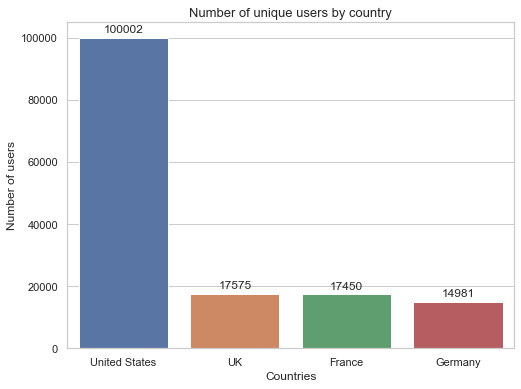

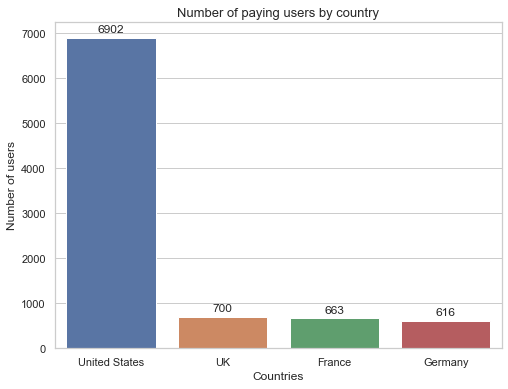

In [18]:
# plotting the number of unique users by country
plt.figure(figsize=(8,6))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='region', y='unique_users', data=profiles_country_breakdown)
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Number of unique users by country', fontsize=13)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of users', fontsize=12)

# plotting the number of paying users by country
plt.figure(figsize=(8,6))
plots = sns.barplot(x='region', y='paying_users', data=paying_profiles_country_breakdown)
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Number of paying users by country', fontsize=13)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of users', fontsize=12)

plt.show()

From the graphs, it can be seen that the largest number of users (66.7% of the total, of which 6.9% are paying users) comes from the United States. Great Britain, France and Germany give approximately equal number of users.

Let's find out which devices visitors use and from which devices the most paying users come.

In [19]:
# formation of a pivot table with unique users broken down by device
profiles_device_breakdown = (
    profiles.pivot_table(
        index='device',  # devices from which users log in
        values='user_id',  # User IDs
        aggfunc='nunique'  # counting unique values
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
profiles_device_breakdown['ratio'] = round(
    profiles_device_breakdown['unique_users'] / 
    profiles_device_breakdown['unique_users'].sum(), 3)

# formation of a pivot table with paying users, broken down by device
paying_profiles_device_breakdown = (
    profiles.loc[profiles['payer'] == True].pivot_table(
        index='device',  # devices from which users log in
        values='user_id',  # User IDs
        aggfunc='nunique'  # counting unique values
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'paying_users'})
    .reset_index()
)
paying_profiles_device_breakdown['ratio'] = round(
    paying_profiles_device_breakdown['paying_users'] / 
    profiles_device_breakdown['unique_users'], 3)

display(profiles_device_breakdown)
display(paying_profiles_device_breakdown)

,device,unique_users,ratio
0,iPhone,54479,0.363
1,Android,35032,0.234
2,PC,30455,0.203
3,Mac,30042,0.200


,device,paying_users,ratio
0,iPhone,3382,0.062
1,Android,2050,0.059
2,Mac,1912,0.063
3,PC,1537,0.051


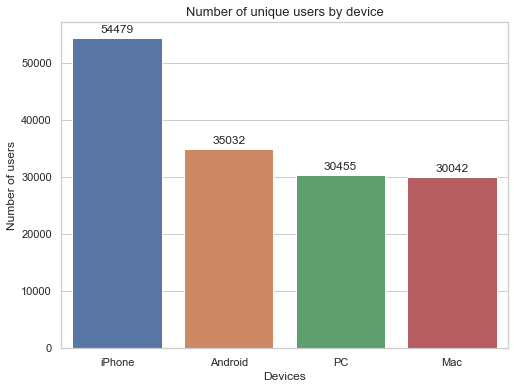

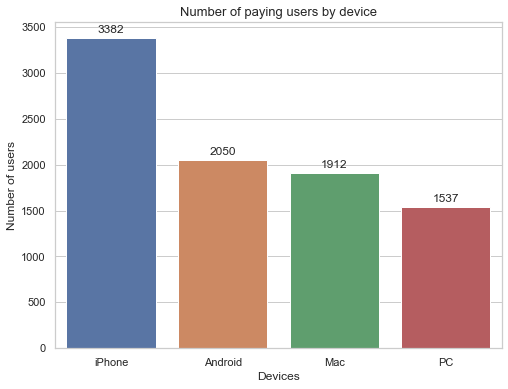

In [20]:
# plotting the number of unique users by device
plt.figure(figsize=(8,6))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='device', y='unique_users', data=profiles_device_breakdown)
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Number of unique users by device', fontsize=13)
plt.xlabel('Devices', fontsize=12)
plt.ylabel('Number of users', fontsize=12)

# plotting the number of paying users by device
plt.figure(figsize=(8,6))
plots = sns.barplot(x='device', y='paying_users', data=paying_profiles_device_breakdown)
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Number of paying users by device', fontsize=13)
plt.xlabel('Devices', fontsize=12)
plt.ylabel('Number of users', fontsize=12)

plt.show()

According to the graphs, we can say that the largest number of users (36.3% of the total) log in from the iPhone. Android, PC and Mac give approximately equal number of users. All platforms give an approximately equal number of paying users (5-6%).

Let's find out which advertising channels were used to attract users and which channels bring in the most paying users.

In [21]:
# formation of a pivot table with unique users, broken down by acquisition channels
profiles_channel_breakdown = (
    profiles.pivot_table(
        index='channel',  # advertising sources
        values='user_id',  # User IDs
        aggfunc='nunique'  # counting unique values
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
profiles_channel_breakdown['ratio'] = round(
    profiles_channel_breakdown['unique_users'] / 
    profiles_channel_breakdown['unique_users'].sum(), 3)

# formation of a pivot table with paying users, broken down by acquisition channels
paying_profiles_channel_breakdown = (
    profiles.loc[profiles['payer'] == True].pivot_table(
        index='channel',  # advertising sources
        values='user_id',  # User IDs
        aggfunc='nunique'  # counting unique values
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'paying_users'})
    .reset_index()
)

# adding a column with the calculation of the ratio of the number of paying users
# to the number of users broken down by acquisition channels
# via table join
paying_profiles_channel_breakdown = paying_profiles_channel_breakdown.merge(
    profiles_channel_breakdown[['channel', 'unique_users']],
    on='channel'
)
paying_profiles_channel_breakdown['ratio'] = round(
    paying_profiles_channel_breakdown['paying_users'] / paying_profiles_channel_breakdown['unique_users'], 
    3
)
paying_profiles_channel_breakdown = (
    paying_profiles_channel_breakdown.drop(columns='unique_users')
    .sort_values(by='paying_users', ascending=False)
)

display(profiles_channel_breakdown)
display(paying_profiles_channel_breakdown)

,channel,unique_users,ratio
0,organic,56439,0.376
1,FaceBoom,29144,0.194
2,TipTop,19561,0.130
3,OppleCreativeMedia,8605,0.057
4,LeapBob,8553,0.057
5,WahooNetBanner,8553,0.057
6,RocketSuperAds,4448,0.030
7,MediaTornado,4364,0.029
8,YRabbit,4312,0.029
9,AdNonSense,3880,0.026


,channel,paying_users,ratio
0,FaceBoom,3557,0.122
1,TipTop,1878,0.096
2,organic,1160,0.021
3,WahooNetBanner,453,0.053
4,AdNonSense,440,0.113
5,RocketSuperAds,352,0.079
6,LeapBob,262,0.031
7,OppleCreativeMedia,233,0.027
8,lambdaMediaAds,225,0.105
9,YRabbit,165,0.038


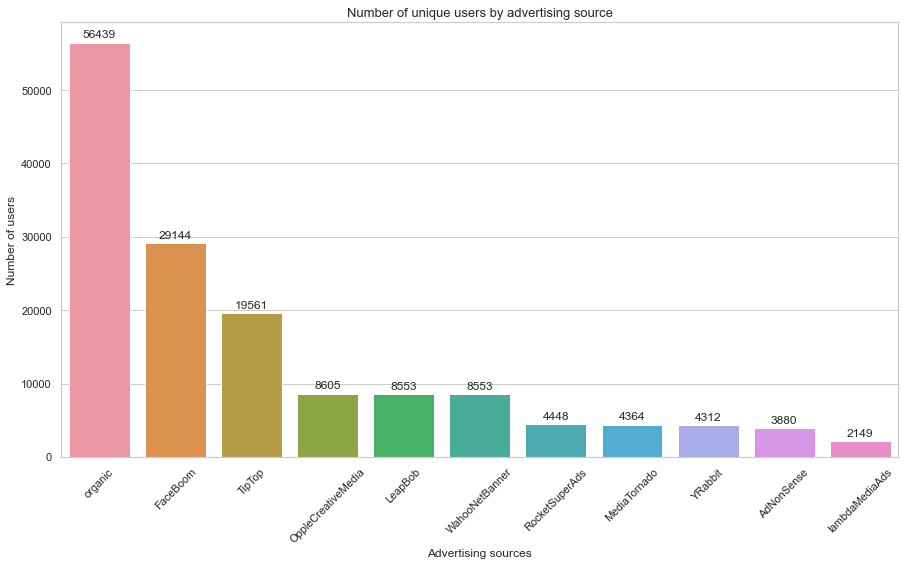

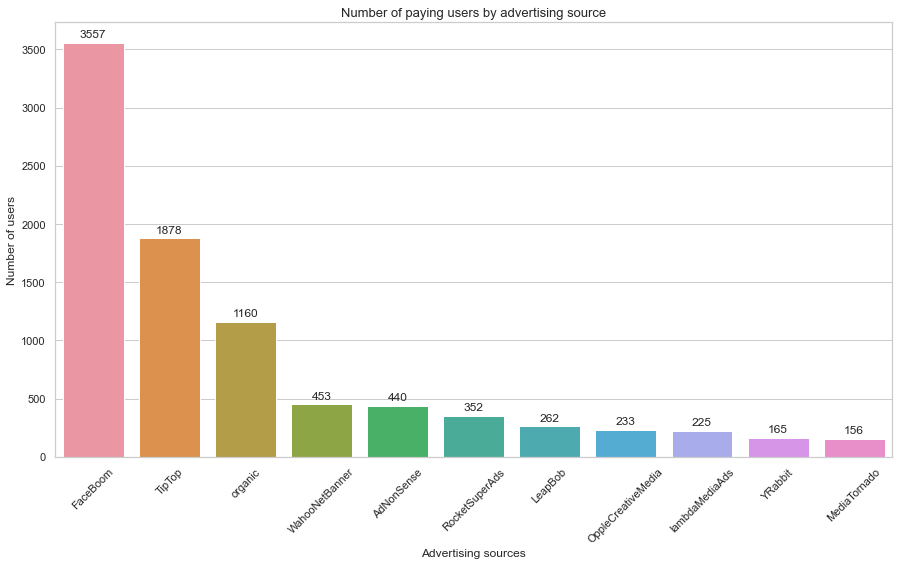

In [22]:
# building a graph of the number of unique users broken down by acquisition channels
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='channel', y='unique_users', data=profiles_channel_breakdown)
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Number of unique users by advertising source', fontsize=13)
plt.xlabel('Advertising sources', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Number of users', fontsize=12)

# building a graph of the number of paying users, broken down by acquisition channels
plt.figure(figsize=(15,8))
plots = sns.barplot(x='channel', y='paying_users', data=paying_profiles_channel_breakdown)
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Number of paying users by advertising source', fontsize=13)
plt.xlabel('Advertising sources', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Number of users', fontsize=12)

plt.show()

With channels of attraction, the situation is not so unambiguous.

According to unique users, the top 3 looks like this:
- organic (by a wide margin) - 37.6%,
- FaceBoom - 19.4%,
- TipTop - 13%.

By paying users, the top 3 looks like this:
- FaceBoom - 12.2%,
- Tip Top - 9.6%,
- organic - 2.1%.

Other advertising sources individually provide a significantly smaller number of users.

**Conclusions**

Let's create user profiles
* The largest number of users comes from the United States, from the iPhone device, from organic traffic and through the advertising channels of FaceBoom and TipTop.
* The largest number of paying users come from the United States, from the iPhone, through the FaceBoom and TipTop advertising channels, and from organic traffic.

## Marketing

Let's find out:
- How much money did you spend? Total / per source / by time
- How much did it cost on average to attract one buyer from each source?

Determine how much money was spent on marketing. To do this, we will use the data from the `costs` table.

In [23]:
print('Total spent on marketing:', round(costs['costs'].sum(), 2), '$')

Total spent on marketing: 105497.3 $


Now let's determine how much money was spent on marketing for each source.

In [24]:
# formation of a summary table with the amount of finance spent, broken down by attraction channels
costs_channel_breakdown = (
    costs.pivot_table(
        index='channel',  # advertising sources
        values='costs',  # spending on advertising source
        aggfunc='sum'  # spending amount
    )
    .sort_values(by='costs', ascending=False)
    .rename(columns={'costs': 'sum_costs'})
    .reset_index()
)
costs_channel_breakdown['ratio'] = round(
    costs_channel_breakdown['sum_costs'] / 
    costs_channel_breakdown['sum_costs'].sum(), 3)

costs_channel_breakdown

,channel,sum_costs,ratio
0,TipTop,54751.30,0.519
1,FaceBoom,32445.60,0.308
2,WahooNetBanner,5151.00,0.049
3,AdNonSense,3911.25,0.037
4,OppleCreativeMedia,2151.25,0.020
5,RocketSuperAds,1833.00,0.017
6,LeapBob,1797.60,0.017
7,lambdaMediaAds,1557.60,0.015
8,MediaTornado,954.48,0.009
9,YRabbit,944.22,0.009


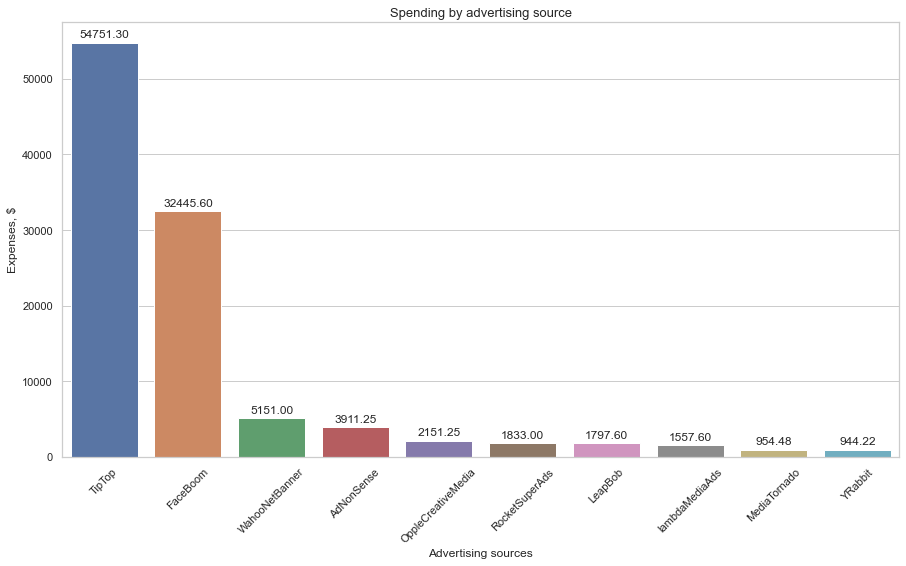

In [25]:
# building a graph of the amount of finance spent, broken down by attraction channels
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='channel', y='sum_costs', data=costs_channel_breakdown)
# adding annotations to a chart
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Spending by advertising source', fontsize=13)
plt.xlabel('Advertising sources', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Expenses, $', fontsize=12)
plt.show()

Let's find out how much money was spent on marketing with distribution over time.

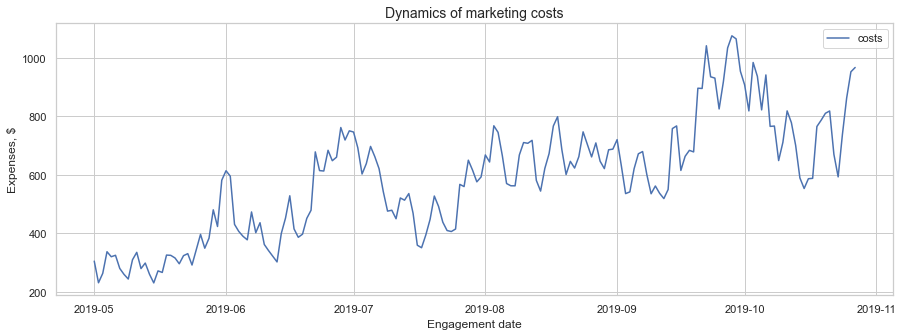

In [26]:
# formation of a pivot table with the amount of money spent, broken down by day
dynamic_costs = (
    costs.pivot_table(
        index='dt',  # dates of first visits
        values='costs',  # spending on advertising source
        aggfunc='sum'  # spending amount
    )
)

# building a graph of the amount of money spent, broken down by day
dynamic_costs.plot(figsize=(15, 5), grid=True)
plt.title('Dynamics of marketing costs', fontsize=14)
plt.xlabel('Engagement date', fontsize=12)
plt.ylabel('Expenses, $', fontsize=12)
plt.show()

Now let's see how the costs for each advertising channel are distributed in dynamics.

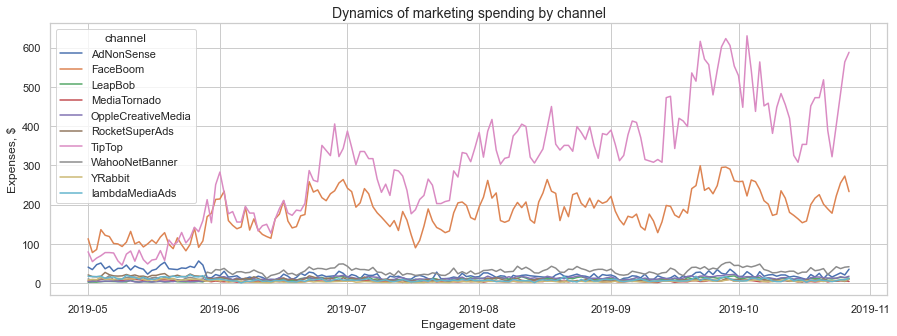

In [27]:
# formation of a summary table with the distribution of funds spent by channels in dynamics
dynamic_costs_by_channel = (
    costs.pivot_table(
        index='dt',  # dates of first visits
        columns='channel', # breakdown by advertising channels
        values='costs',  # spending on advertising source
        aggfunc='sum'  # spending amount
    )
)

# building a graph of the amount of money spent, broken down by day
dynamic_costs_by_channel.plot(figsize=(15, 5), grid=True)
plt.title('Dynamics of marketing spending by channel', fontsize=14)
plt.xlabel('Engagement date', fontsize=12)
plt.ylabel('Expenses, $', fontsize=12)
plt.show()

It's time to calculate how much it cost to attract one user. To do this, we calculate the average CAC (Customer Acquisition Cost) per user for the entire project.

In [28]:
print('Average CAC per user for the entire project:', 
      round(profiles.loc[profiles['channel'] != 'organic', 'acquisition_cost'].mean(), 2), '$')

Average CAC per user for the entire project: 1.13 $


Now let's calculate the average CAC per user for each traffic source. We will exclude users with organic traffic from the calculations, since we do not pay for them.

In [29]:
# formation of a pivot table with average CAC per user for each traffic source
mean_cac_channel_breakdown = (
    profiles.query('channel != "organic"').pivot_table(
        index='channel',  # advertising sources
        values='acquisition_cost',  # spending on advertising source
        aggfunc='mean'  # average spending per advertising source
    )
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'mean_cac'})
)
mean_cac_channel_breakdown['mean_cac'] = round(mean_cac_channel_breakdown['mean_cac'], 2)

mean_cac_channel_breakdown

,mean_cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Let's find out how the cost of attraction for each source varies from cohort to cohort. To do this, we will build a pivot table in which the row names will be the dates of user acquisition, the column names will be the acquisition channels, and the values will be the average CAC, and we will plot the history of changes on it.

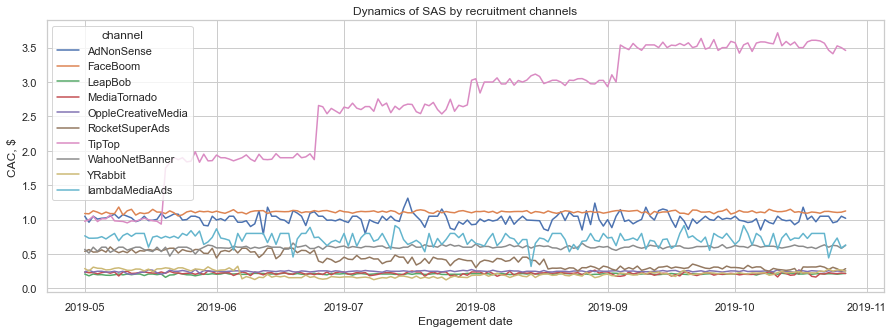

In [30]:
# we build a graph of the history of CAC changes by acquisition channels

profiles.query('channel != "organic"').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 5))
plt.ylabel('CAC, $')
plt.xlabel('Engagement date')
plt.title('Dynamics of SAS by recruitment channels')
plt.show()

**Conclusions**
- It was possible to determine on which sources the largest amount of funds was spent:
    * Tip Top - 51.9%,
    * FaceBoom - 30.8%
- Total marketing costs are rising throughout the period. Seasonality is not observed. There is some increase in costs at the beginning of each month. The peak is noticeable at the end of September, beginning of October. It can be assumed that this is due to an attempt to improve sales figures, attract new users.
- Calculated average CAC per user for the entire project and it is 1.13,
- Achieved top 3 advertising channels in terms of average CAC:
    * TipTop - 2.8
    * FaceBoom - 1.11
    * AdNonSense - 1.01
- The value of the average CAC is growing on the TipTop channel throughout the entire period. The rest of the channels are stable. This means that the marketing department most likely considers this channel to be effective and periodically increases spending on user acquisition through it. You need to look at other indicators on this channel to get an objective picture.

## Estimating the ROI of advertising to attract users

With LTV and ROI:
- Analyze the overall payback of advertising;
- Analyze the payback of advertising by device;
- Analyze the payback of advertising by country;
- Let's analyze the payback of advertising with a breakdown by advertising channels.

Let's describe the problems. We will answer the questions:
- Does advertising aimed at attracting users in general pay off?
- What devices, countries and advertising channels can have a negative impact on advertising ROI?
- What can cause payback problems? Explore conversion and retention by device, country, advertising channel.

We will describe the possible causes of the detected problems and form recommendations for the advertising department. When solving this step, we assume that we are looking at the data on November 1, 2019 and that it is customary in our organization that payback should occur no later than 2 weeks after user acquisition.

First you need to set the moment and horizon of data analysis. We know that we are looking at data on November 1st, 2019 and that our organization believes that payback should be no later than 2 weeks after user acquisition.

In [31]:
observation_date = datetime(2019, 11, 1).date()  # moment of analysis
horizon_days = 14  # analysis horizon

### Analysis of the total advertising payback

Let's evaluate the general situation - let's look at the payback of advertising. Calculate and visualize LTV and ROI by calling the `get_ltv()` and `plot_ltv_roi()` functions. We will exclude information about users with organic traffic from profiles, since we do not pay for them.

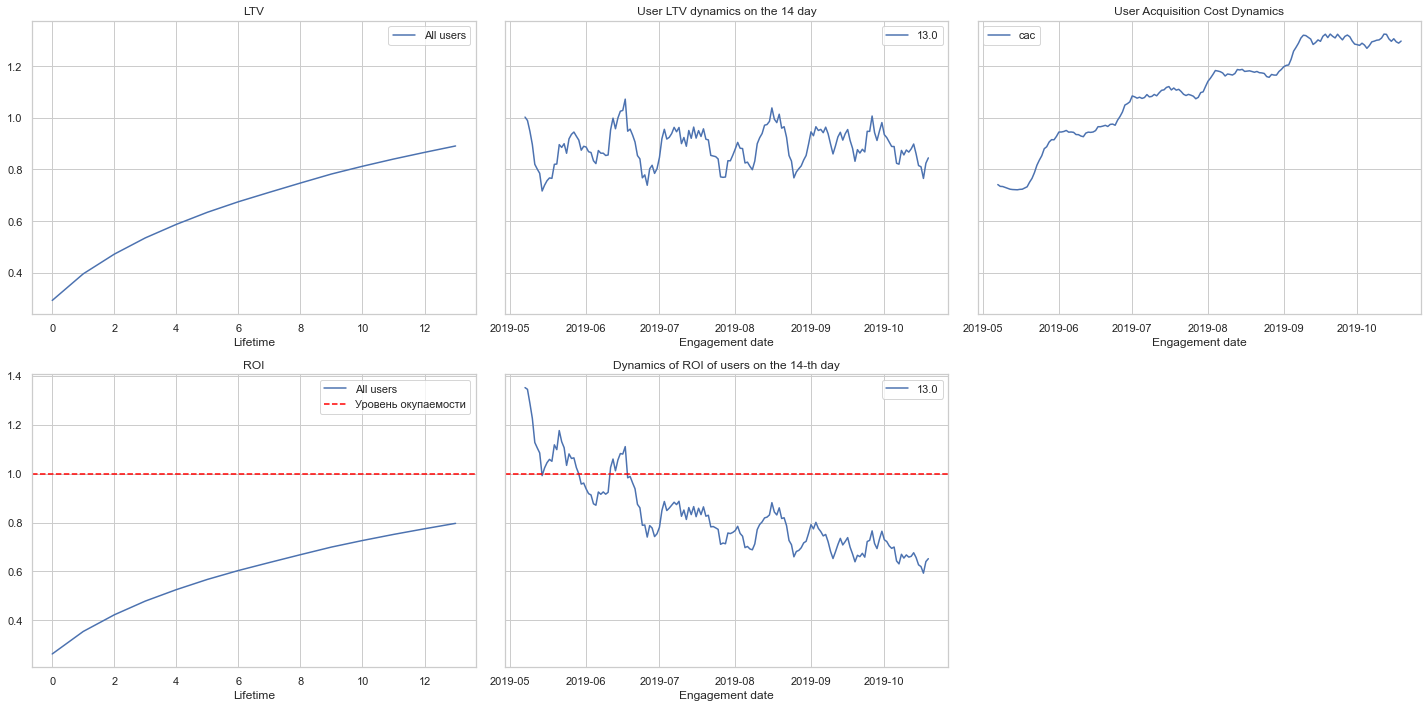

In [32]:
# we will create auxiliary user profiles without taking into account organic traffic
profiles_without_organic = profiles.query('channel != "organic"')

# calculate LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days
)

# we build graphs
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**According to the graphs, we can draw the following conclusions:**
- The LTV curve is constantly growing as expected, the indicator is quite stable.
- Advertising practically does not pay off. ROI at the end of the two-week period is below the payback level. The dynamics of ROI is constantly decreasing.
- CAC is constantly growing, which means that the advertising budget is constantly increasing.

To understand the reasons, let's go through all the available user characteristics - country, source and device of the first visit.

### Analysis of advertising ROI by country

Let's start with a breakdown by country: pass the `region` column to the `dimensions` parameter.

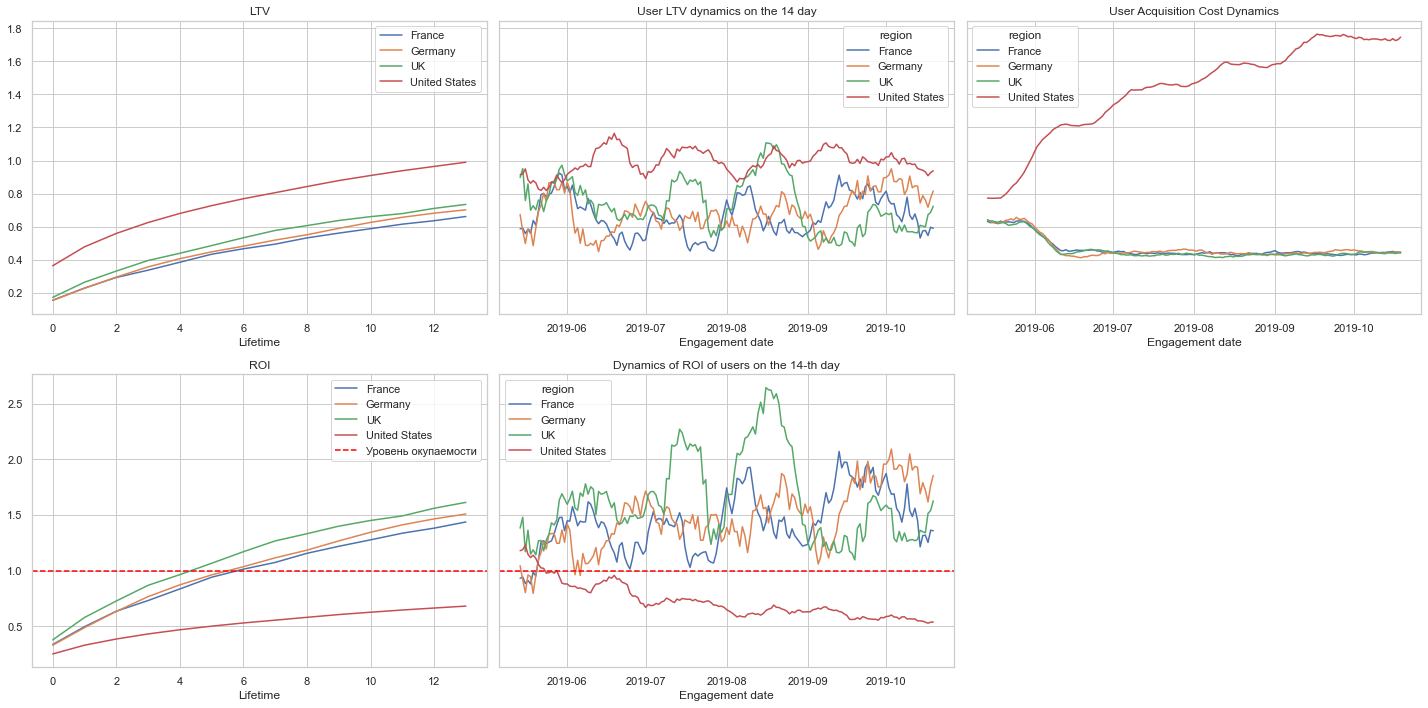

In [33]:
# look at the payback by country

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Here's what the charts say:**
- Advertising pays off in the UK, Germany and France. The indicators are good.
- There is a clear outsider, advertising in the United States does not pay off. ROI is below the payback limit.
- The cost of attraction is stable and the same for France, Germany and the UK. However, the cost of user acquisition in the United States is much higher and constantly rising.

### Advertising ROI analysis by advertising channel

Now let's check the sources of attraction (channel).

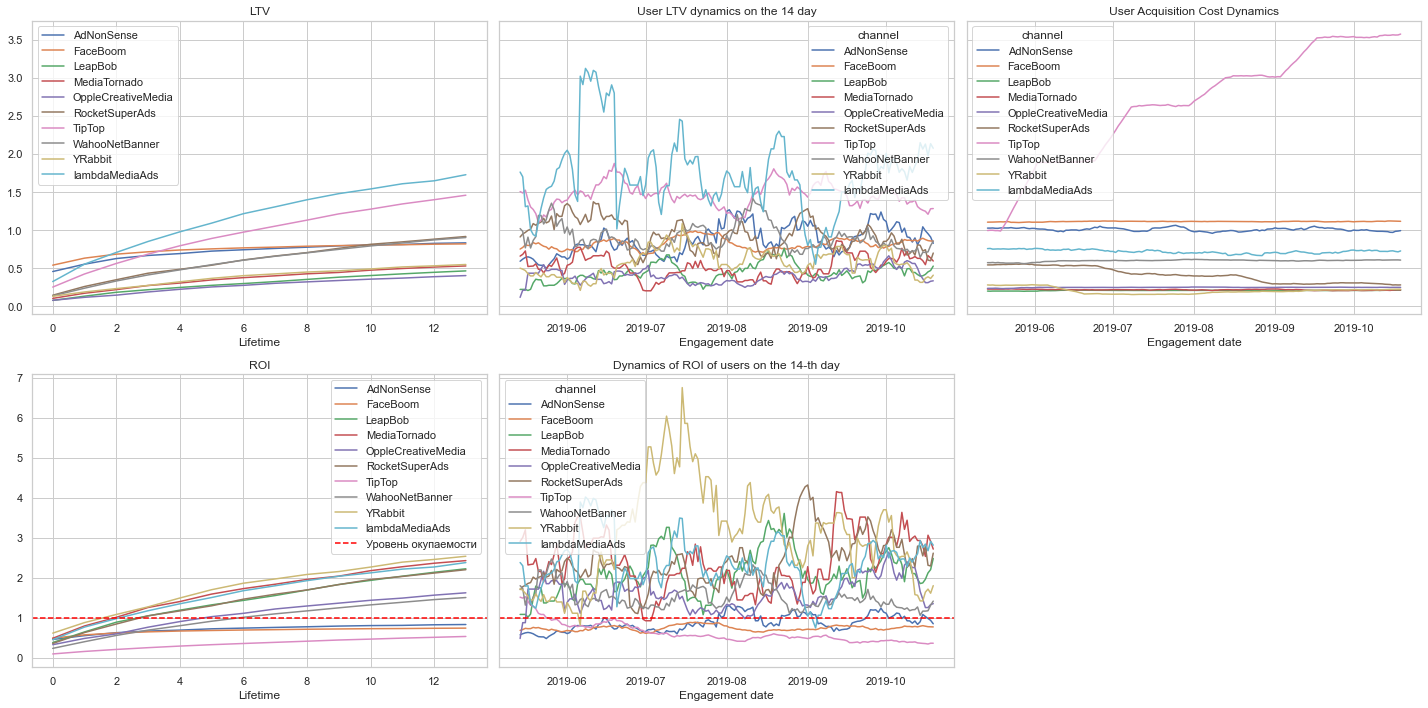

In [34]:
# see payback broken down by advertising channels
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

With a breakdown by channels, the situation is ambiguous.

**Here's what the charts say:**
- There are obvious outsiders in advertising channels. Advertising does not pay off on AdNonSense, FaceBoom and TipTop.
- The growth of the advertising budget is strongly influenced by the constantly growing CAC through the TipTop channel. For other channels, CAC is stable.
- YRabbit, MediaTornado and lambdaMediaAds pay off the best.

### Ad ROI analysis by device

Let's move on to devices.

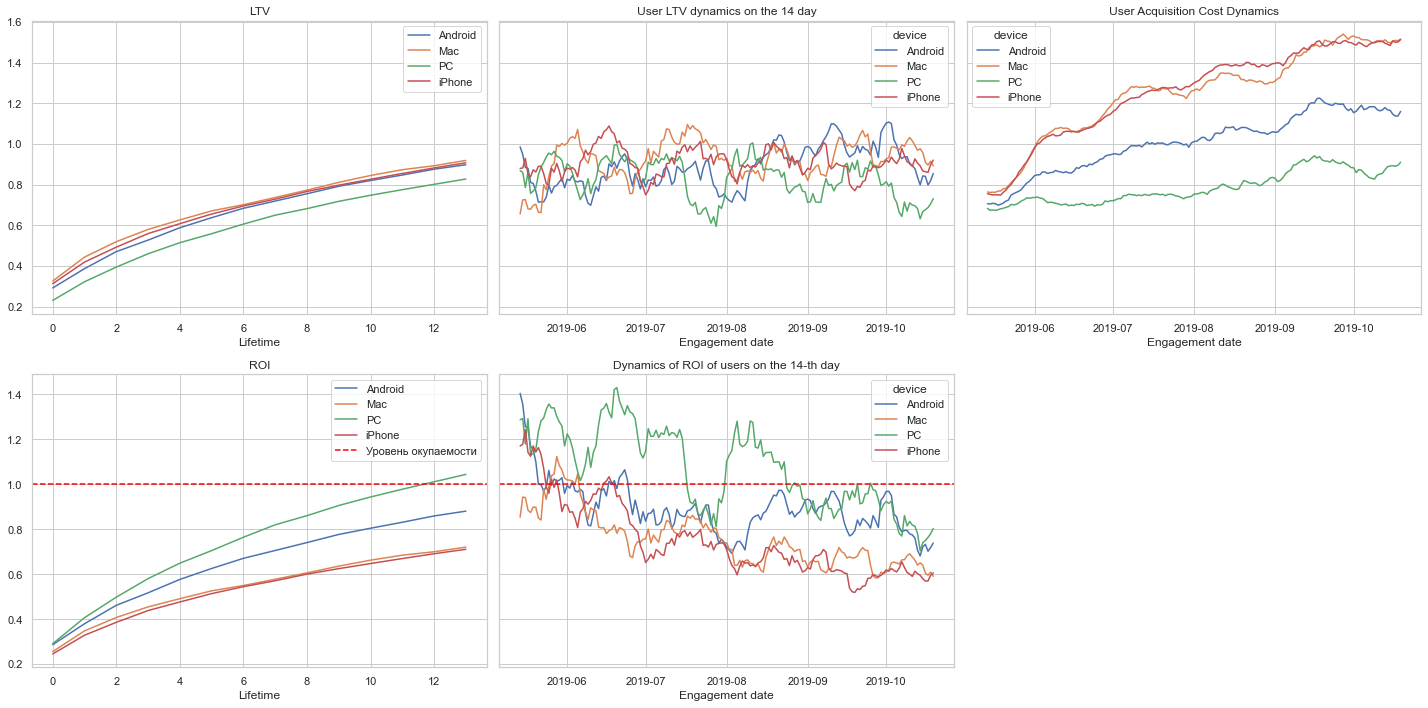

In [35]:
# see payback by device

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Here's what the charts say:**
- PC users pay off, iPhone, Mac and Android owners don't.
- Ad budgets are growing on all devices, but especially on iPhone and Mac.

**Conclusions**

During the analysis of the payback of advertising, it was possible to find out the following:
* Advertising is not paying off, a failed advertising campaign in the United States (where 66.7% of users are concentrated with the largest share of paying users of any country) makes adjustments to the overall figures. Also, the purchase of ads in AdNonSense, FaceBoom and TipTop has an impact, which does not pay off, although it gives a total of 35% of users (of which 11.1% are paying), as well as iPhone, Mac and Android users (79.7% of users, of which 6.14% paying).
* The advertising budget is constantly growing, the culprits are almost the same: the United States, TipTop, iPhone and Mac.

We will find out what is the reason: low conversion or low retention.
Let's calculate and visualize the conversion by calling the `get_conversion()` and `plot_conversion()` functions.

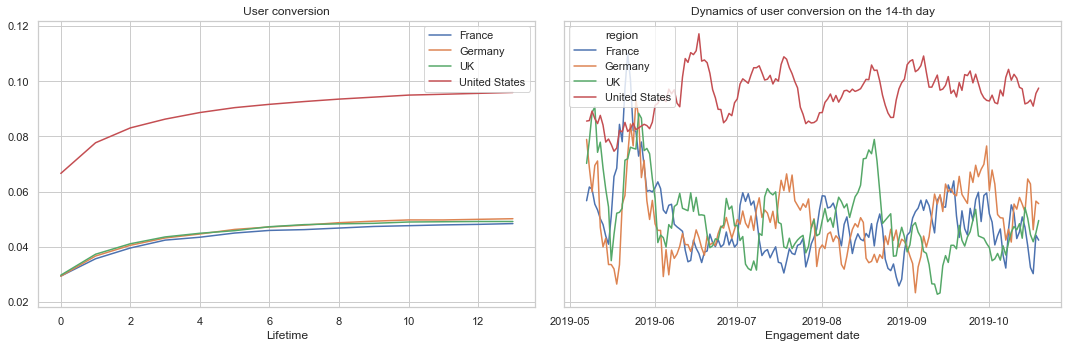

In [36]:
# see conversion by country

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Based on the graphs, users from the United States are converting very well, and consistently. Apparently it's about retention. Let's call the functions `get_retention()` and `plot_retention()` to calculate and plot this indicator.

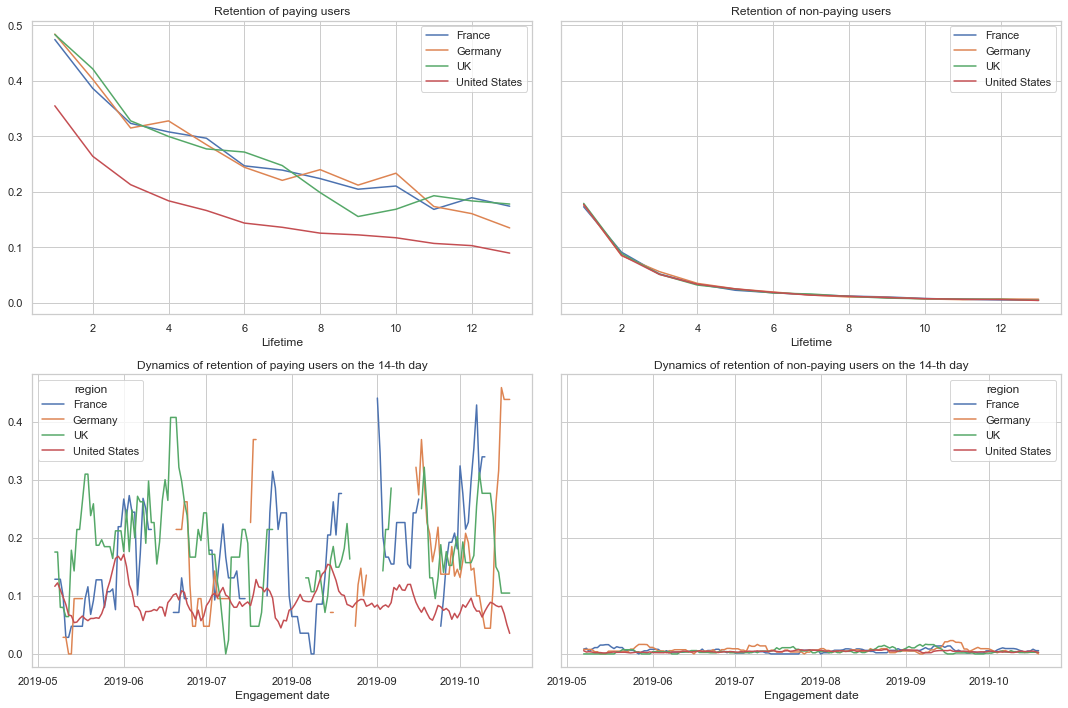

In [37]:
# see retention by country

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Indeed, users from the United States are less well-retained than users from other countries. Perhaps this is due to the devices and channels of attraction. Let's take a look at conversion and retention by device.

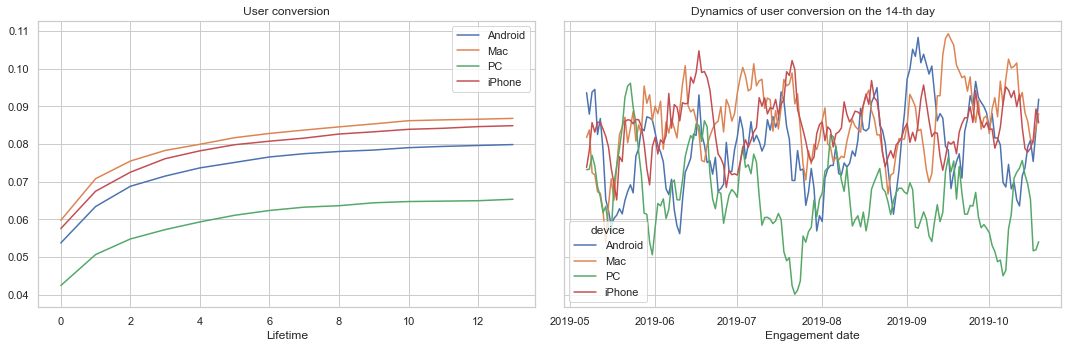

In [38]:
# see conversion by device

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Judging by the graphs, iPhone, Mac and Android users are converting very well, and consistently. It's most likely a matter of retention. Let's call the functions `get_retention()` and `plot_retention()` to calculate and plot this indicator.

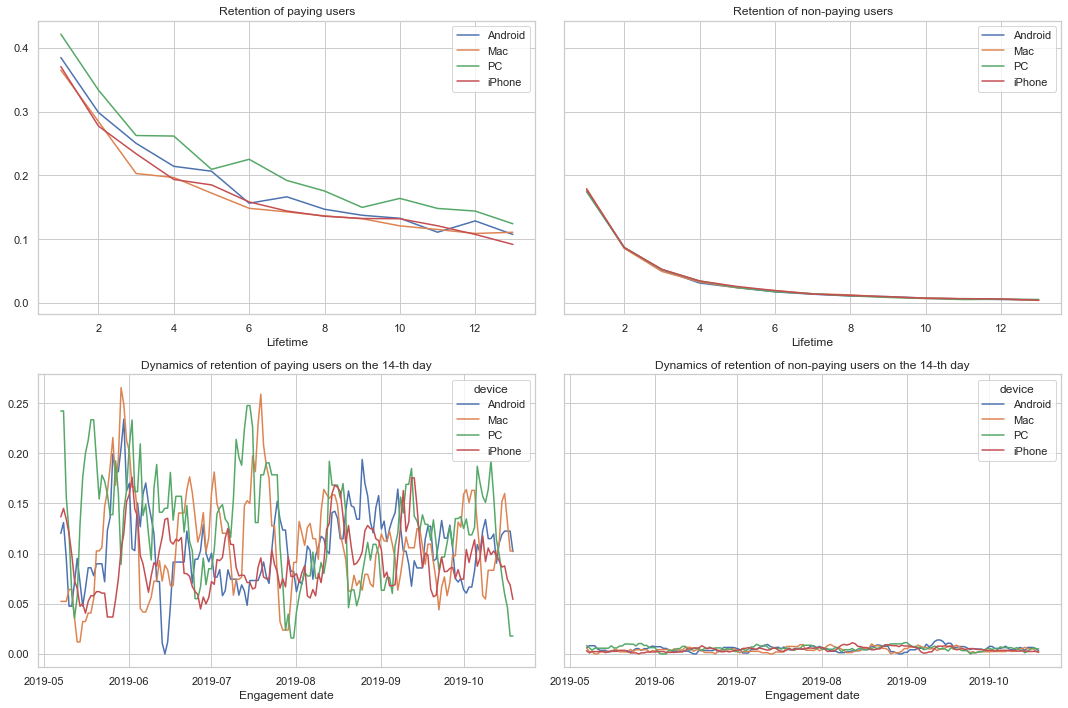

In [39]:
# view retention by device

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Here, iPhone and Mac users are held back in exactly the same way as Android and PC users. We just need to test conversion and retention by advertising channel.

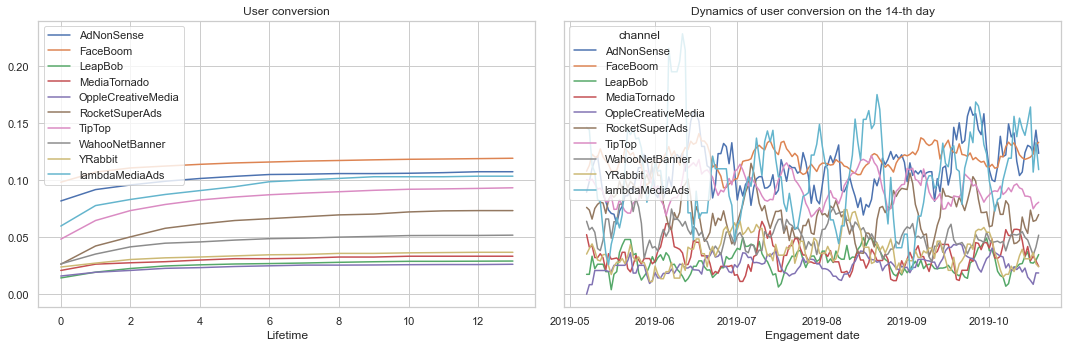

In [40]:
# look at the conversion broken down by advertising channels

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Judging by the graphs, the conversion for all sources, although low, is stable. Our outsiders AdNonSense, FaceBoom and TipTop have higher conversion rates than other sources. Apparently it's about retention. Let's call the functions `get_retention()` and `plot_retention()` to calculate and plot this indicator.

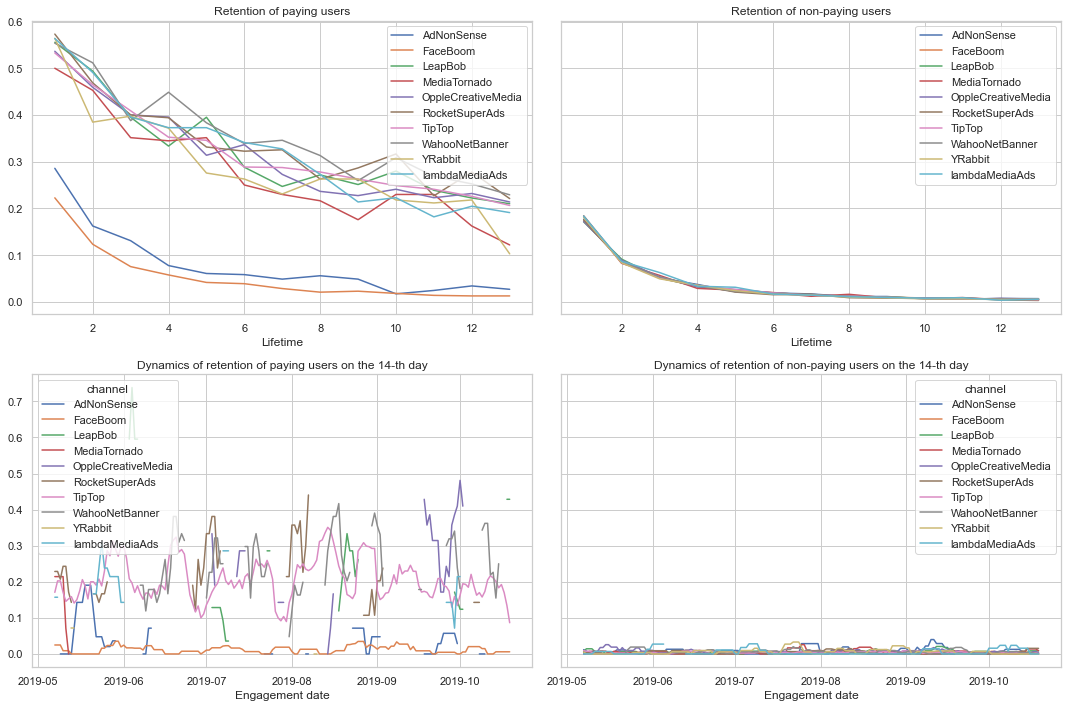

In [41]:
# View retention by ad channels

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

So we found the main reason - the low retention of paying users attracted with the help of AdNonSense and FaceBoom. We remember that these channels do not pay off.

Let's test the hypothesis about the influence of user acquisition channels in a particular country. To do this, we will create user profiles from the US and by iPhone, Mac, Android devices and look at marketing costs in the context of advertising channels.

In [42]:
# create secondary user profiles from the United States
profiles_from_usa = profiles_without_organic.loc[profiles['region'] == 'United States']

# formation of a summary table with the amount of finance spent, broken down by attraction channels
usa_costs_channel_breakdown = (
    profiles_from_usa.pivot_table(
        index='channel',  # advertising sources
        values='acquisition_cost',  # spending on advertising source
        aggfunc='sum'  # spending amount
    )
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'sum_costs'})
)
usa_costs_channel_breakdown['total_ratio'] = round(
    usa_costs_channel_breakdown['sum_costs'] / 
    costs['costs'].sum(), 3)

usa_costs_channel_breakdown

,sum_costs,total_ratio
channel,,
TipTop,54751.30,0.519
FaceBoom,32445.60,0.308
RocketSuperAds,1833.00,0.017
MediaTornado,954.48,0.009
YRabbit,944.22,0.009


In [43]:
# сформируем вспомогательные профили пользователей с устройствами iPhone и Mac
apple_profiles = profiles_without_organic.loc[(profiles['device'] == 'iPhone') 
                                              | (profiles['device'] == 'Mac') |
                                              (profiles['device'] == 'Android')]

# формирование сводной таблицы c суммой потраченных финансов с разбивкой по каналам привлечения
apple_costs_channel_breakdown = (
    apple_profiles.pivot_table(
        index='channel',  # рекламные источники
        values='acquisition_cost',  # траты на рекламный источник
        aggfunc='sum'  # сумма трат
    )
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'sum_costs'})
)
apple_costs_channel_breakdown['sum_costs'] = round(
    apple_costs_channel_breakdown['sum_costs'], 2)
apple_costs_channel_breakdown['total_ratio'] = round(
    apple_costs_channel_breakdown['sum_costs'] / 
    costs['costs'].sum(), 3)

apple_costs_channel_breakdown

,sum_costs,total_ratio
channel,,
TipTop,49069.83,0.465
FaceBoom,29096.37,0.276
WahooNetBanner,3098.38,0.029
AdNonSense,2333.90,0.022
RocketSuperAds,1642.63,0.016
OppleCreativeMedia,1277.32,0.012
LeapBob,1082.79,0.010
lambdaMediaAds,937.08,0.009
MediaTornado,855.84,0.008


**Conclusions**
- Our hypothesis was partially correct, 30.8% of the total marketing budget was spent on the inefficient FaceBoom acquisition channel in the United States.
- 29.8% of all marketing budget was spent on inefficient FaceBoom and AdNonSense acquisition channels for iPhone, Mac and Android users.

## General conclusions
- Highlight the reasons for the inefficiency of attracting users;
- We will form recommendations for the marketing department to improve efficiency.

The study revealed that:
- Advertising in the United States does not pay off, despite a large number of paying users (where 66.7% of users are concentrated with the largest share of paying users of any country), the highest advertising costs and high conversions. The hypothesis about the influence of user acquisition channels turned out to be partially correct, 30.8% of the entire marketing budget was spent on the inefficient FaceBoom acquisition channel.
- Advertising for iPhone, Mac and Android users does not pay off, but there is a fairly high conversion and stable retention. It was also determined that 29.8% of the total marketing budget was spent on inefficient FaceBoom and AdNonSense acquisition channels among iPhone, Mac and Android users.
- The main factor in the inefficiency of attracting users is the incorrect choice of channels for attracting users and spending on marketing. Therefore, recommendations for the marketing department to improve efficiency can be the following:
    * Refuse to fund AdNonSense and FaceBoom advertising channels due to non-return and poor user retention, this will save 34.5% of the total advertising budget.
    * Increase funding for RocketSuperAds, WahooNetBanner and lambdaMediaAds advertising channels due to good ROI and good conversion rates, these channels currently account for 8.1% of the total advertising budget.
    * Reduce funding for the TipTop channel despite good conversion and stable retention. It takes 51.9% of the total advertising budget. Ideally, achieve an average CAC of around 0.72, like the lambdaMediaAds channel, which has a high conversion rate at a much lower cost.
    * After changing the advertising budget, compare performance after 14 days for further actions to optimize user acquisition.